In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Regression with Sckit-learn

In [115]:
np.random.seed(0)#By using a random seed, you can ensure that the random numbers generated are the same every time the code is run.
m=100 # creating 100 samples
X=np.linspace(0,10, m).reshape(m,1)
Y=X+np.random.randn(m,1)


In [116]:
np.shape(X)

(100, 1)

In [117]:
np.shape(Y)

(100, 1)

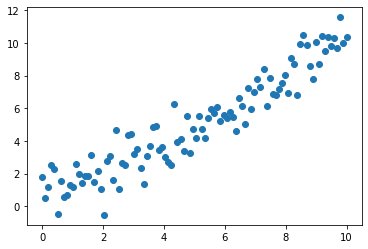

In [50]:
plt.scatter(X,Y)

In [118]:
from sklearn.linear_model import LinearRegression
    

In [119]:
model=LinearRegression()

model.fit(X,Y)



LinearRegression()

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.

But there are other evaluation techniques :

https://scikit-learn.org/stable/search.html?q=+evaluation+metrics

In [120]:
model.score(X,Y)

0.8881140743377214

In [121]:
predictions=model.predict(X)



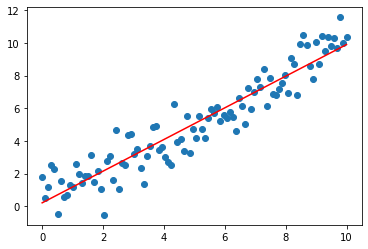

In [55]:
plt.scatter(X,Y)
plt.plot(X,predictions,c='r')

## Classification with Sckit-learn:titanic survivors

In [122]:
titanic=sns.load_dataset('titanic')
titanic.shape


(891, 15)

In [123]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [104]:
titanic=titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)#Remove missing values.
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


look on the map to choose the right estimator you want to apply :

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
model2=KNeighborsClassifier()

In [88]:
Y=titanic['survived']
X=titanic.drop('survived', axis=1)


In [89]:
model2.fit(X,Y)
model2.score(X,Y)

0.8319327731092437

In [90]:
model2.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [91]:
def survie (model,pclass,sex,age):
    x=np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    

In [92]:
survie(model2, 3, 0, 25)

[0]


Return probability estimates for the data X.

In [93]:
def survie (model,pclass,sex,age):
    x=np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [21]:
survie(model2, 3, 0, 25)

[0]
[[0.6 0.4]]


## Train-test split

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [124]:
iris = load_iris( )


(150, 4)
(150,)


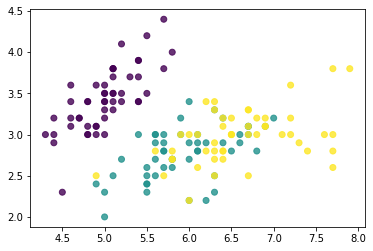

In [125]:
X=iris.data
Y=iris.target
print(X.shape)
print(Y.shape)
plt.scatter( X[:,0] ,X[:,1], c=Y, alpha=0.8)

In [107]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test,Y_train,Y_test=train_test_split(X, Y, test_size= 0.2)
print( 'train set', X_train.shape)
print( 'test set', X_test.shape)

train set (120, 4)
test set (30, 4)


here is what our test set and train set look like 

Text(0.5, 1.0, 'test_set')

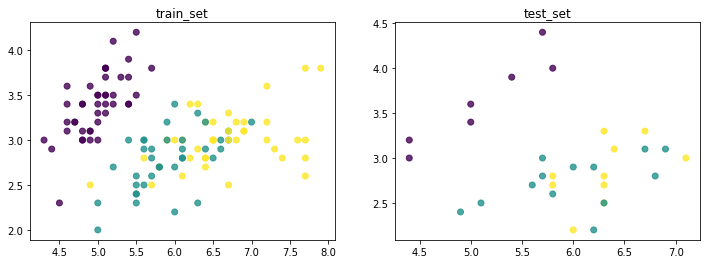

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,alpha=0.8)
plt.title("train_set")

plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test,alpha=0.8)
plt.title("test_set")


In [108]:
model=KNeighborsClassifier(n_neighbors=1)


In [109]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [110]:
model.score(X_train,Y_train)

1.0

In [111]:
model.score(X_test,Y_test)

0.9333333333333333

# Validation dataset

In [57]:
#we change the number of neighbors
model=KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9666666666666667

In [58]:
from sklearn.model_selection import cross_val_score

scoring by default the one associated to the model here is  accuracy 

In [59]:
cross_val_score(KNeighborsClassifier(),X_train,Y_train, cv=5, scoring='accuracy')

array([0.95833333, 1.        , 0.95833333, 0.95833333, 0.95833333])

In [60]:
cross_val_score(KNeighborsClassifier(),X_train,Y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

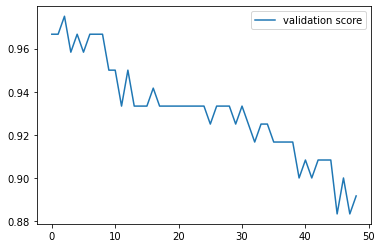

In [61]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),X_train,Y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)

    
plt.plot(val_score, label='validation score')
plt.legend()

    

but you don't need to do this yourself there is a function in sckit-learn to create this kind of graph it is the validation curve function 
### Validation Curve

In [62]:
from sklearn.model_selection import validation_curve

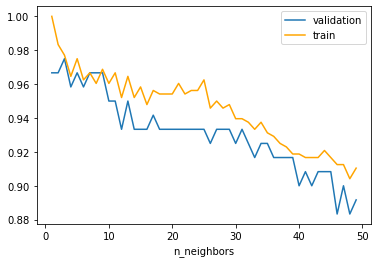

In [84]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,X_train,Y_train,param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_neighbors')
plt.legend()

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
model=grid.fit(X_train,Y_train)

In [66]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [67]:
grid.best_score_

0.975

In [68]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(Y_test,model.predict(X_test))

array([[ 6,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 15]], dtype=int64)

# Learning Curve

In [71]:
from sklearn.model_selection import learning_curve

[19 38 57 76 96]


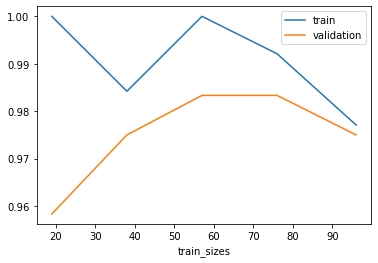

In [79]:
train_sizes, train_scores, test_scores=learning_curve(KNeighborsClassifier(n_neighbors= 3,metric= 'euclidean'),X_train,Y_train,train_sizes=np.linspace(0.2,1.0,5), cv=5)
print(N)

plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,test_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()